# Traitement des images

Notamment pour l'étude du volume. De combien de pourcents le volume de l'hydrogel augmente-t-il pendant sa congélation ?

### Calcul de l'augmentation du volume

Nombre de pixels verts détectés : 635911
Nombre de pixels rouges détectés : 46554
Pourcentage d'augmentation : 7.32%


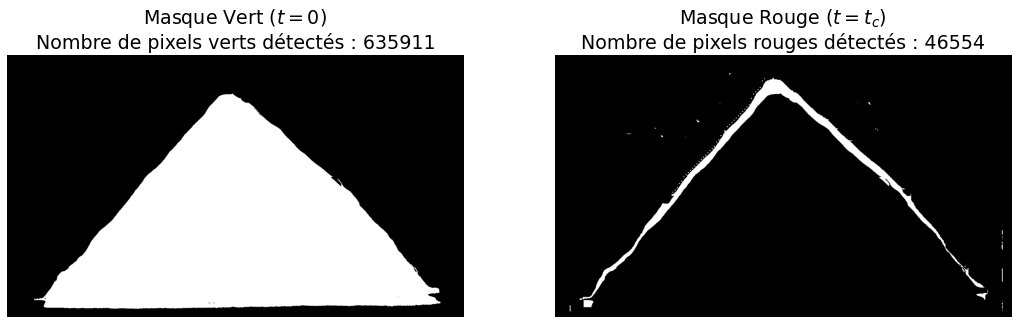

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image
image_path = 'Ratio Début Fin.png'
image = cv2.imread(image_path)

# Vérifier si l'image est correctement chargée
if image is None:
    raise FileNotFoundError(f"L'image n'a pas pu être chargée à partir du chemin {image_path}")

# Convertir l'image en espace colorimétrique HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Définir la gamme de couleurs pour le vert et le rouge
lower_green = np.array([35, 100, 100])
upper_green = np.array([85, 255, 255])
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Créer des masques pour extraire les pixels verts et rouges
mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)

# Calculer le nombre de pixels verts et rouges
green_area = np.sum(mask_green > 0)
red_area = np.sum(mask_red > 0)

# Afficher les valeurs intermédiaires pour déboguer
print(f"Nombre de pixels verts détectés : {green_area}")
print(f"Nombre de pixels rouges détectés : {red_area}")

# Calculer le pourcentage d'augmentation de la superficie
if green_area == 0:
    raise ValueError("La surface verte est nulle, impossible de calculer le pourcentage d'augmentation.")
    
percentage_increase = (red_area / green_area) * 100
print(f"Pourcentage d'augmentation : {percentage_increase:.2f}%")

# Afficher les masques verts et rouges avec le nombre de pixels détectés
plt.figure(figsize=(18, 11))



plt.subplot(1, 2, 1)
plt.title(f'Masque Vert ($t=0$) \nNombre de pixels verts détectés : {green_area}')
plt.imshow(mask_green, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Masque Rouge ($t=t_c$) \nNombre de pixels rouges détectés : {red_area}')
plt.imshow(mask_red, cmap='gray')
plt.axis('off')

plt.savefig("Augmentation du volume.png")
plt.show()


Nombre de pixels verts détectés : 635911
Nombre de pixels rouges détectés : 46554
Pourcentage d'augmentation : 7.32%


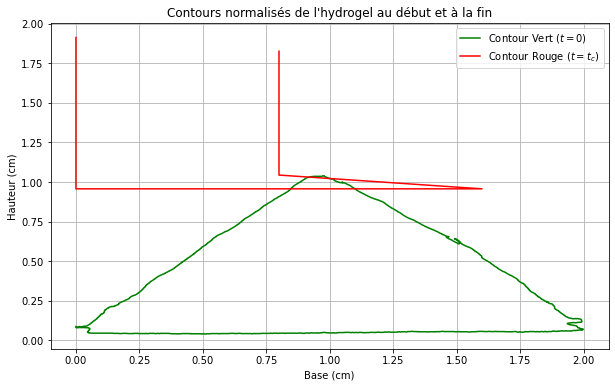

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image
image_path = 'Ratio Début Fin.png'
image = cv2.imread(image_path)

# Vérifier si l'image est correctement chargée
if image is None:
    raise FileNotFoundError(f"L'image n'a pas pu être chargée à partir du chemin {image_path}")

# Convertir l'image en espace colorimétrique HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Définir la gamme de couleurs pour le vert et le rouge
lower_green = np.array([35, 100, 100])
upper_green = np.array([85, 255, 255])
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Créer des masques pour extraire les pixels verts et rouges
mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)

# Calculer le nombre de pixels verts et rouges
green_area = np.sum(mask_green > 0)
red_area = np.sum(mask_red > 0)

# Afficher les valeurs intermédiaires pour déboguer
print(f"Nombre de pixels verts détectés : {green_area}")
print(f"Nombre de pixels rouges détectés : {red_area}")

# Calculer le pourcentage d'augmentation de la superficie
if green_area == 0:
    raise ValueError("La surface verte est nulle, impossible de calculer le pourcentage d'augmentation.")
    
percentage_increase = (red_area / green_area) * 100
print(f"Pourcentage d'augmentation : {percentage_increase:.2f}%")

# Détection des contours
contours_green, _ = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_red, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Normalisation des contours pour les tracer dans un graphique
def normalize_contour(contour, base_length, img_height):
    # Trouver la bounding box du contour
    x, y, w, h = cv2.boundingRect(contour)
    scale_x = base_length / w
    scale_y = (base_length / 2) / h  # car la hauteur est la moitié de la base
    points = []
    for point in contour:
        # Normaliser les points
        norm_x = (point[0][0] - x) * scale_x
        norm_y = (img_height - point[0][1]) * scale_y
        points.append((norm_x, norm_y))
    return points

# Normaliser les contours verts et rouges
base_length = 2  # en cm
height_length = 1  # en cm
image_height, _ = image.shape[:2]

green_contour_points = normalize_contour(contours_green[0], base_length, image_height) if contours_green else []
red_contour_points = normalize_contour(contours_red[0], base_length, image_height) if contours_red else []

# Tracer les contours normalisés dans Matplotlib
plt.figure(figsize=(10, 6))

# Tracer le contour vert
if green_contour_points:
    green_x, green_y = zip(*green_contour_points)
    plt.plot(green_x, green_y, label='Contour Vert ($t=0$)', color='green')

# Tracer le contour rouge
if red_contour_points:
    red_x, red_y = zip(*red_contour_points)
    plt.plot(red_x, red_y, label='Contour Rouge ($t=t_c$)', color='red')

plt.xlabel('Base (cm)')
plt.ylabel('Hauteur (cm)')
plt.title('Contours normalisés de l\'hydrogel au début et à la fin')
plt.legend()
plt.grid(True)
plt.savefig("Contours_Normalises.png")
plt.show()

Nombre de pixels verts détectés : 635911
Nombre de pixels rouges détectés : 46554
Pourcentage d'augmentation : 7.32%


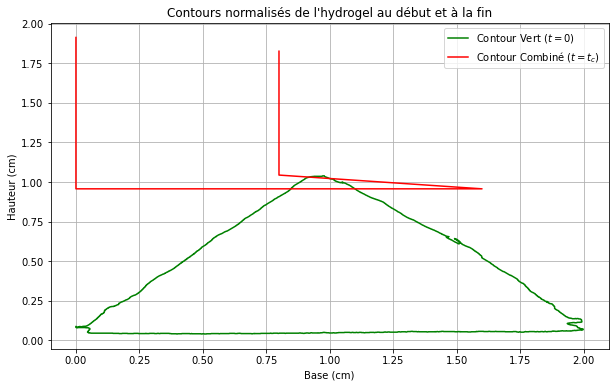

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image
image_path = 'Ratio Début Fin.png'
image = cv2.imread(image_path)

# Vérifier si l'image est correctement chargée
if image is None:
    raise FileNotFoundError(f"L'image n'a pas pu être chargée à partir du chemin {image_path}")

# Convertir l'image en espace colorimétrique HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Définir la gamme de couleurs pour le vert et le rouge
lower_green = np.array([35, 100, 100])
upper_green = np.array([85, 255, 255])
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Créer des masques pour extraire les pixels verts et rouges
mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)

# Calculer le nombre de pixels verts et rouges
green_area = np.sum(mask_green > 0)
red_area = np.sum(mask_red > 0)

# Afficher les valeurs intermédiaires pour déboguer
print(f"Nombre de pixels verts détectés : {green_area}")
print(f"Nombre de pixels rouges détectés : {red_area}")

# Calculer le pourcentage d'augmentation de la superficie
if green_area == 0:
    raise ValueError("La surface verte est nulle, impossible de calculer le pourcentage d'augmentation.")
    
percentage_increase = (red_area / green_area) * 100
print(f"Pourcentage d'augmentation : {percentage_increase:.2f}%")

# Détection des contours pour la partie verte
contours_green, _ = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Fusionner les masques verts et rouges pour obtenir un masque combiné
mask_combined = cv2.bitwise_or(mask_green, mask_red)

# Détection des contours pour la partie combinée (verte + rouge)
contours_combined, _ = cv2.findContours(mask_combined, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Normalisation des contours pour les tracer dans un graphique
def normalize_contour(contour, base_length, img_height):
    # Trouver la bounding box du contour
    x, y, w, h = cv2.boundingRect(contour)
    scale_x = base_length / w
    scale_y = (base_length / 2) / h  # car la hauteur est la moitié de la base
    points = []
    for point in contour:
        # Normaliser les points
        norm_x = (point[0][0] - x) * scale_x
        norm_y = (img_height - point[0][1]) * scale_y
        points.append((norm_x, norm_y))
    return points

# Normaliser les contours verts et combinés
base_length = 2  # en cm
height_length = 1  # en cm
image_height, _ = image.shape[:2]

green_contour_points = normalize_contour(contours_green[0], base_length, image_height) if contours_green else []
combined_contour_points = normalize_contour(contours_combined[0], base_length, image_height) if contours_combined else []

# Tracer les contours normalisés dans Matplotlib
plt.figure(figsize=(10, 6))

# Tracer le contour vert
if green_contour_points:
    green_x, green_y = zip(*green_contour_points)
    plt.plot(green_x, green_y, label='Contour Vert ($t=0$)', color='green')

# Tracer le contour combiné (vert + rouge)
if combined_contour_points:
    combined_x, combined_y = zip(*combined_contour_points)
    plt.plot(combined_x, combined_y, label='Contour Combiné ($t=t_c$)', color='red')

plt.xlabel('Base (cm)')
plt.ylabel('Hauteur (cm)')
plt.title('Contours normalisés de l\'hydrogel au début et à la fin')
plt.legend()
plt.grid(True)
plt.savefig("Contours_Normalises.png")
plt.show()


Nombre de pixels verts détectés : 635911
Nombre de pixels rouges détectés : 46554
Pourcentage d'augmentation : 7.32%


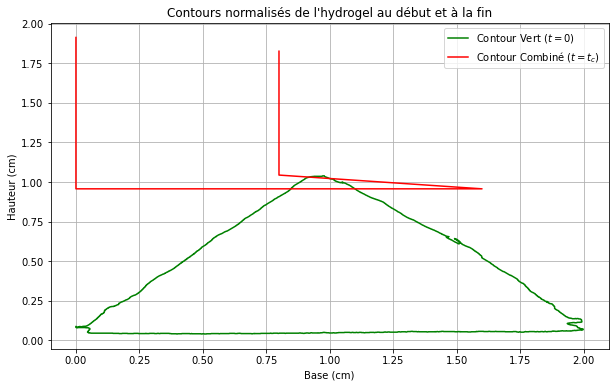

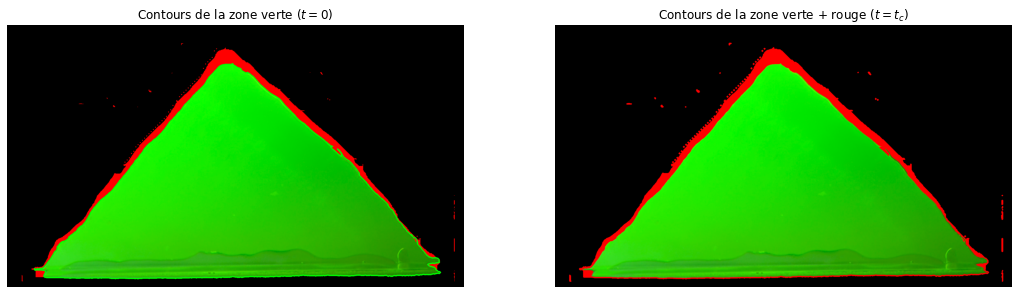

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image
image_path = 'Ratio Début Fin.png'
image = cv2.imread(image_path)

# Vérifier si l'image est correctement chargée
if image is None:
    raise FileNotFoundError(f"L'image n'a pas pu être chargée à partir du chemin {image_path}")

# Convertir l'image en espace colorimétrique HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Définir la gamme de couleurs pour le vert et le rouge
lower_green = np.array([35, 100, 100])
upper_green = np.array([85, 255, 255])
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Créer des masques pour extraire les pixels verts et rouges
mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)

# Calculer le nombre de pixels verts et rouges
green_area = np.sum(mask_green > 0)
red_area = np.sum(mask_red > 0)

# Afficher les valeurs intermédiaires pour déboguer
print(f"Nombre de pixels verts détectés : {green_area}")
print(f"Nombre de pixels rouges détectés : {red_area}")

# Calculer le pourcentage d'augmentation de la superficie
if green_area == 0:
    raise ValueError("La surface verte est nulle, impossible de calculer le pourcentage d'augmentation.")
    
percentage_increase = (red_area / green_area) * 100
print(f"Pourcentage d'augmentation : {percentage_increase:.2f}%")

# Détection des contours pour la partie verte
contours_green, _ = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Fusionner les masques verts et rouges pour obtenir un masque combiné
mask_combined = cv2.bitwise_or(mask_green, mask_red)

# Créer une image noire et blanche où tout ce qui n'est pas noir devient blanc
_, mask_combined_bw = cv2.threshold(mask_combined, 1, 255, cv2.THRESH_BINARY)

# Détection des contours pour la partie combinée en noir et blanc
contours_combined_bw, _ = cv2.findContours(mask_combined_bw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Copier les images pour tracer les contours
image_with_contours_green = image.copy()
image_with_contours_combined_bw = image.copy()

# Tracer les contours verts sur l'image
cv2.drawContours(image_with_contours_green, contours_green, -1, (0, 255, 0), 3)

# Tracer les contours combinés en noir et blanc sur l'image
cv2.drawContours(image_with_contours_combined_bw, contours_combined_bw, -1, (0, 0, 255), 3)

# Normalisation des contours pour les tracer dans un graphique
def normalize_contour(contour, base_length, img_height):
    # Trouver la bounding box du contour
    x, y, w, h = cv2.boundingRect(contour)
    scale_x = base_length / w
    scale_y = (base_length / 2) / h  # car la hauteur est la moitié de la base
    points = []
    for point in contour:
        # Normaliser les points
        norm_x = (point[0][0] - x) * scale_x
        norm_y = (img_height - point[0][1]) * scale_y
        points.append((norm_x, norm_y))
    return points

# Normaliser les contours verts et combinés
base_length = 2  # en cm
height_length = 1  # en cm
image_height, _ = image.shape[:2]

green_contour_points = normalize_contour(contours_green[0], base_length, image_height) if contours_green else []
combined_contour_points = normalize_contour(contours_combined_bw[0], base_length, image_height) if contours_combined_bw else []

# Tracer les contours normalisés dans Matplotlib
plt.figure(figsize=(10, 6))

# Tracer le contour vert
if green_contour_points:
    green_x, green_y = zip(*green_contour_points)
    plt.plot(green_x, green_y, label='Contour Vert ($t=0$)', color='green')

# Tracer le contour combiné (vert + rouge)
if combined_contour_points:
    combined_x, combined_y = zip(*combined_contour_points)
    plt.plot(combined_x, combined_y, label='Contour Combiné ($t=t_c$)', color='red')

plt.xlabel('Base (cm)')
plt.ylabel('Hauteur (cm)')
plt.title('Contours normalisés de l\'hydrogel au début et à la fin')
plt.legend()
plt.grid(True)
plt.savefig("Contours_Normalises.png")
plt.show()

# Afficher les images avec les contours tracés
plt.figure(figsize=(18, 11))

plt.subplot(1, 2, 1)
plt.title('Contours de la zone verte ($t=0$)')
plt.imshow(cv2.cvtColor(image_with_contours_green, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Contours de la zone verte + rouge ($t=t_c$)')
plt.imshow(cv2.cvtColor(image_with_contours_combined_bw, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


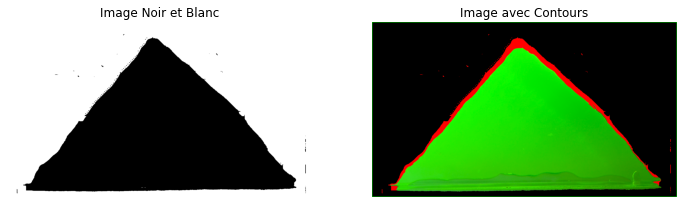

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image
image_path = 'Ratio Début Fin.png'  # Remplacez par le chemin réel de votre image
image = cv2.imread(image_path)

# Vérifier si l'image est correctement chargée
if image is None:
    raise FileNotFoundError(f"L'image n'a pas pu être chargée à partir du chemin {image_path}")

# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer un seuil pour convertir l'image en noir et blanc
_, binary_image = cv2.threshold(gray_image, 1, 255, cv2.THRESH_BINARY_INV)

# Détecter les contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Tracer les contours sur une copie de l'image d'origine
image_with_contours = image.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

# Afficher l'image avec les contours
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Image Noir et Blanc')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Image avec Contours')
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


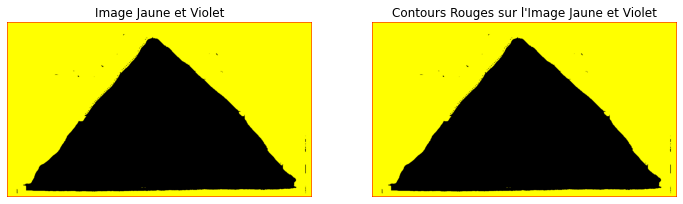

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image
image_path = 'Ratio Début Fin.png'  # Remplacez par le chemin réel de votre image
image = cv2.imread(image_path)

# Vérifier si l'image est correctement chargée
if image is None:
    raise FileNotFoundError(f"L'image n'a pas pu être chargée à partir du chemin {image_path}")

# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer un seuil pour créer une image binaire où le noir reste noir
_, binary_image = cv2.threshold(gray_image, 1, 255, cv2.THRESH_BINARY_INV)

# Créer une image en jaune et violet
yellow_violet_image = np.zeros_like(image)

# Définir les couleurs jaune et violet
yellow = (0, 255, 255)  # BGR pour jaune
violet = (128, 0, 128)  # BGR pour violet

# Remplacer les pixels non noirs par jaune
yellow_violet_image[binary_image == 255] = yellow

# Créer un masque pour la détection des contours (zone noire)
contour_mask = binary_image.copy()

# Détecter les contours sur le masque
contours, _ = cv2.findContours(contour_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Tracer les contours sur l'image jaune et violet
# Définir la couleur rouge en BGR et l'épaisseur du contour
red = (0, 0, 255)
thickness = 3  # Épaisseur du contour

# Tracer les contours
cv2.drawContours(yellow_violet_image, contours, -1, red, thickness)

# Afficher l'image en jaune et violet avec les contours tracés
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Image Jaune et Violet')
plt.imshow(cv2.cvtColor(yellow_violet_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Contours Rouges sur l\'Image Jaune et Violet')
plt.imshow(cv2.cvtColor(yellow_violet_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


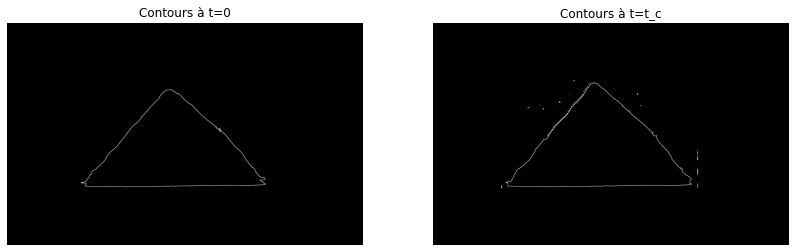

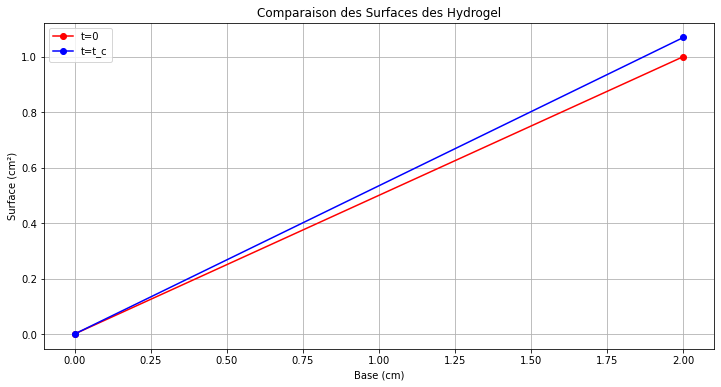

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_and_process_image(image_path):
    """
    Charge l'image, la convertit en niveaux de gris et applique un seuil pour obtenir une image binaire.
    """
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"L'image n'a pas pu être chargée à partir du chemin {image_path}")
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, 1, 255, cv2.THRESH_BINARY)
    return binary_image

def detect_contours(binary_image):
    """
    Détecte les contours dans une image binaire.
    """
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def calculate_area(contours):
    """
    Calcule la surface en pixels de la plus grande forme détectée.
    """
    areas = [cv2.contourArea(c) for c in contours]
    if areas:
        return max(areas)
    return 0

def convert_pixels_to_cm(area, base_cm, height_cm, reference_area):
    """
    Convertit l'aire en pixels en centimètres en utilisant la référence de l'hydrogel initial.
    """
    reference_area_cm = base_cm * height_cm / 2  # Aire du triangle de référence en cm²
    scaling_factor = reference_area_cm / reference_area
    return area * scaling_factor

# Chemins vers les images
image_path_t0 = 'DebutTri.png'  # Remplacez par le chemin réel
image_path_tc = 'TriFin.png'  # Remplacez par le chemin réel

# Traitement des images
binary_image_t0 = load_and_process_image(image_path_t0)
binary_image_tc = load_and_process_image(image_path_tc)

# Détection des contours
contours_t0 = detect_contours(binary_image_t0)
contours_tc = detect_contours(binary_image_tc)

# Calcul de la surface en pixels
area_pixels_t0 = calculate_area(contours_t0)
area_pixels_tc = calculate_area(contours_tc)

# Références de dimensions du triangle initial
base_cm_t0 = 2  # cm
height_cm_t0 = 1  # cm

# Conversion des surfaces en cm²
area_cm2_t0 = convert_pixels_to_cm(area_pixels_t0, base_cm_t0, height_cm_t0, area_pixels_t0)
area_cm2_tc = convert_pixels_to_cm(area_pixels_tc, base_cm_t0, height_cm_t0, area_pixels_t0)

# Créer des images pour afficher les contours
contour_image_t0 = np.zeros_like(binary_image_t0)
contour_image_tc = np.zeros_like(binary_image_tc)

# Tracer les contours sur les images
cv2.drawContours(contour_image_t0, contours_t0, -1, (255), 2)
cv2.drawContours(contour_image_tc, contours_tc, -1, (255), 2)

# Afficher les images avec les contours tracés
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.title('Contours à t=0')
plt.imshow(contour_image_t0, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Contours à t=t_c')
plt.imshow(contour_image_tc, cmap='gray')
plt.axis('off')

plt.show()

# Tracer le graphique des dimensions
plt.figure(figsize=(12, 6))

# Tracer les contours
plt.plot([0, base_cm_t0], [0, area_cm2_t0], 'ro-', label='t=0')
plt.plot([0, base_cm_t0], [0, area_cm2_tc], 'bo-', label='t=t_c')

plt.xlabel('Base (cm)')
plt.ylabel('Surface (cm²)')
plt.title('Comparaison des Surfaces des Hydrogel')
plt.legend()
plt.grid(True)
plt.show()


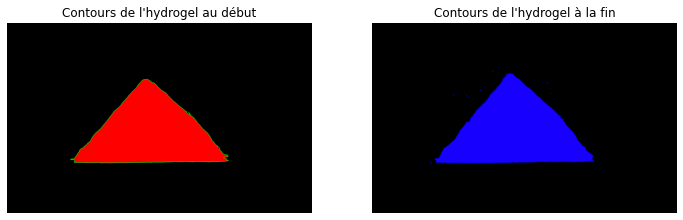

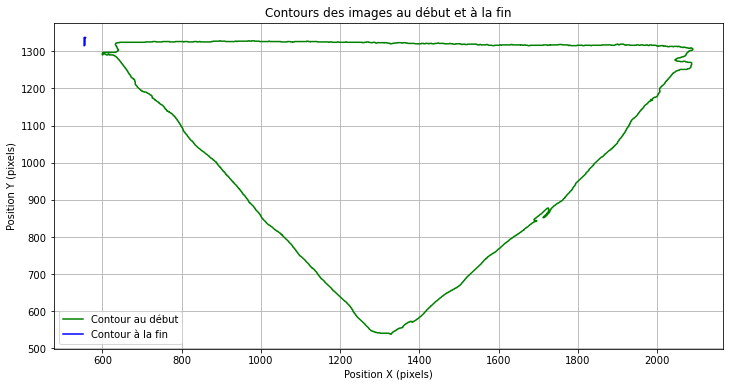

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_and_process_image(image_path):
    """
    Charge l'image, la convertit en niveaux de gris et applique un seuil pour obtenir une image binaire.
    """
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"L'image n'a pas pu être chargée à partir du chemin {image_path}")
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, 1, 255, cv2.THRESH_BINARY)
    return binary_image

def detect_contours(binary_image):
    """
    Détecte les contours dans une image binaire.
    """
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

# Chemins vers les images
image_path_debut = 'DebutTri.png'
image_path_fin = 'TriFin.png'

# Traitement des images
binary_image_debut = load_and_process_image(image_path_debut)
binary_image_fin = load_and_process_image(image_path_fin)

# Détection des contours
contours_debut = detect_contours(binary_image_debut)
contours_fin = detect_contours(binary_image_fin)

# Copier les images pour tracer les contours
image_with_contours_debut = cv2.imread(image_path_debut).copy()
image_with_contours_fin = cv2.imread(image_path_fin).copy()

# Tracer les contours sur les images
cv2.drawContours(image_with_contours_debut, contours_debut, -1, (0, 255, 0), 3)  # Contours en vert pour début
cv2.drawContours(image_with_contours_fin, contours_fin, -1, (255, 0, 0), 3)  # Contours en bleu pour fin

# Afficher les images avec les contours tracés
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Contours de l\'hydrogel au début')
plt.imshow(cv2.cvtColor(image_with_contours_debut, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Contours de l\'hydrogel à la fin')
plt.imshow(cv2.cvtColor(image_with_contours_fin, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

# Optionnel : Afficher les contours sur un graphique en utilisant Matplotlib
def extract_contour_coordinates(contours):
    """
    Extrait les coordonnées des contours pour la visualisation.
    """
    if not contours:
        return [], []
    contour = contours[0]
    x, y = zip(*[point[0] for point in contour])
    return x, y

x_debut, y_debut = extract_contour_coordinates(contours_debut)
x_fin, y_fin = extract_contour_coordinates(contours_fin)

plt.figure(figsize=(12, 6))

# Tracer le contour pour le début
if x_debut and y_debut:
    plt.plot(x_debut, y_debut, label='Contour au début', color='green')

# Tracer le contour pour la fin
if x_fin and y_fin:
    plt.plot(x_fin, y_fin, label='Contour à la fin', color='blue')

plt.xlabel('Position X (pixels)')
plt.ylabel('Position Y (pixels)')
plt.title('Contours des images au début et à la fin')
plt.legend()
plt.grid(True)
plt.savefig("Contours_Comparison.png")
plt.show()


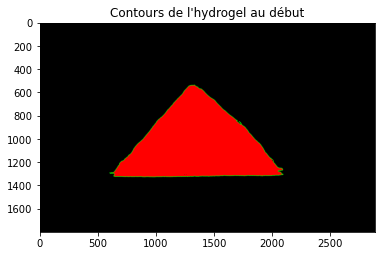

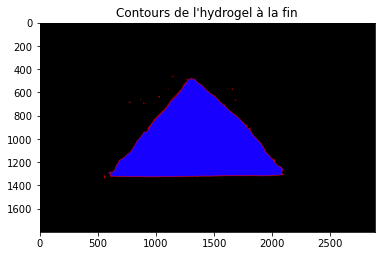

In [86]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_and_process_image(image_path):
    """
    Charge l'image, la convertit en niveaux de gris et applique un seuil pour obtenir une image binaire.
    """
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"L'image n'a pas pu être chargée à partir du chemin {image_path}")
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, 1, 255, cv2.THRESH_BINARY)
    return binary_image

def detect_contours(binary_image):
    """
    Détecte les contours dans une image binaire.
    """
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

# Chemin vers l'image
image_path_debut = 'DebutTri.png'
image_path_fin = 'TriFin.png'

# Traitement de l'image
binary_image_debut = load_and_process_image(image_path_debut)
binary_image_fin = load_and_process_image(image_path_fin)

# Détection des contours
contours_debut = detect_contours(binary_image_debut)
contours_fin = detect_contours(binary_image_fin)

# Copier l'image pour tracer les contours
image_with_contours_debut = cv2.imread(image_path_debut).copy()
image_with_contours_fin = cv2.imread(image_path_fin).copy()

# Tracer les contours sur l'image
cv2.drawContours(image_with_contours_debut, contours_debut, -1, (0, 255, 0), 3)  # Contours en vert
cv2.drawContours(image_with_contours_fin, contours_fin, -1, (0,0, 255), 3)  # Contours en vert

# Afficher l'image avec les contours tracés
plt.figure(figsize=(6, 6))
plt.title('Contours de l\'hydrogel au début')
plt.imshow(cv2.cvtColor(image_with_contours_debut, cv2.COLOR_BGR2RGB))

plt.figure(figsize=(6, 6))
plt.title('Contours de l\'hydrogel à la fin')
plt.imshow(cv2.cvtColor(image_with_contours_fin, cv2.COLOR_BGR2RGB))
#plt.savefig("Contours_Debut.png")
plt.show()




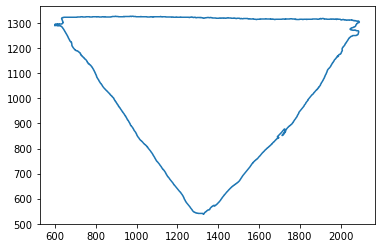

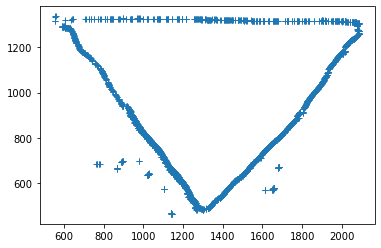

In [102]:
x_d = []
y_d = []

x_f = []
y_f = []

for i in range(len(contours_debut[0])):
    x,y = contours_debut[0][i][0]
    x_d.append(x)
    y_d.append(y)
    
x_d = np.array(x_d)
y_d = np.array(y_d)

plt.figure()
plt.plot(x_d, y_d)

for j in range(len(contours_fin)):
    for i in range(len(contours_fin[j])):
        x,y = contours_fin[j][i][0]
        x_f.append(x)
        y_f.append(y)
    
plt.figure()
plt.plot(x_f, y_f, '+')


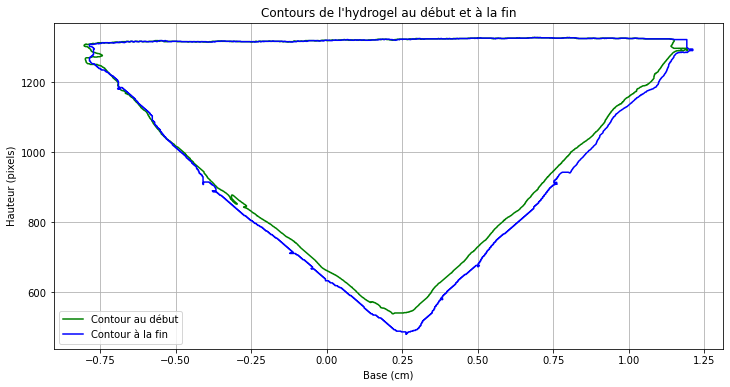

In [105]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_and_process_image(image_path):
    """
    Charge l'image, la convertit en niveaux de gris et applique un seuil pour obtenir une image binaire.
    """
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"L'image n'a pas pu être chargée à partir du chemin {image_path}")
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, 1, 255, cv2.THRESH_BINARY)
    return binary_image

def detect_and_filter_contours(binary_image, min_area=500):
    """
    Détecte et filtre les contours en fonction de leur aire minimale.
    """
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filtered_contours = [c for c in contours if cv2.contourArea(c) > min_area]
    return filtered_contours

def normalize_contour(contour, base_length, image_height):
    """
    Normalise les coordonnées du contour pour que la base du triangle soit alignée avec l'axe X.
    """
    # Calculer la bounding box du contour
    x, y, w, h = cv2.boundingRect(contour)
    scale_x = base_length / w  # Échelle basée sur la largeur du contour
    points = [(point[0][0] * scale_x, image_height - point[0][1]) for point in contour]
    return points

def rotate_contour(points, angle, image_center):
    """
    Applique une rotation aux points du contour.
    """
    angle_rad = np.deg2rad(angle)
    cos_angle = np.cos(angle_rad)
    sin_angle = np.sin(angle_rad)
    cx, cy = image_center
    rotated_points = []
    for x, y in points:
        x_new = cx + (x - cx) * cos_angle - (y - cy) * sin_angle
        y_new = cy + (x - cx) * sin_angle + (y - cy) * cos_angle
        rotated_points.append((x_new, y_new))
    return rotated_points

# Chemins vers les images
image_path_debut = 'DebutTri.png'
image_path_fin = 'TriFin.png'

# Traitement des images
binary_image_debut = load_and_process_image(image_path_debut)
binary_image_fin = load_and_process_image(image_path_fin)

# Détection et filtrage des contours
min_area = 1000  # Aire minimale pour filtrer les petits contours parasites
contours_debut = detect_and_filter_contours(binary_image_debut, min_area)
contours_fin = detect_and_filter_contours(binary_image_fin, min_area)

# Normaliser les contours pour la base du triangle
base_length = 2  # longueur de la base en cm

# Extraire et normaliser les coordonnées des contours
image_height_debut, _ = binary_image_debut.shape
image_height_fin, _ = binary_image_fin.shape

contour_debut_points = normalize_contour(contours_debut[0], base_length, image_height_debut) if contours_debut else []
contour_fin_points = normalize_contour(contours_fin[0], base_length, image_height_fin) if contours_fin else []

# Définir le centre de l'image pour la rotation
image_center_debut = (base_length / 2, image_height_debut / 2)
image_center_fin = (base_length / 2, image_height_fin / 2)

# Appliquer la rotation de 180 degrés aux contours
rotated_contour_debut_points = rotate_contour(contour_debut_points, 180, image_center_debut)
rotated_contour_fin_points = rotate_contour(contour_fin_points, 180, image_center_fin)

# Convertir les points en coordonnées X et Y
def extract_coordinates(points):
    x, y = zip(*points) if points else ([], [])
    return list(x), list(y)

x_debut, y_debut = extract_coordinates(rotated_contour_debut_points)
x_fin, y_fin = extract_coordinates(rotated_contour_fin_points)

# Tracer les contours sur le graphique
plt.figure(figsize=(12, 6))

# Tracer le contour pour le début
if x_debut and y_debut:
    plt.plot(x_debut, y_debut, label='Contour au début', color='green')

# Tracer le contour pour la fin
if x_fin and y_fin:
    plt.plot(x_fin, y_fin, label='Contour à la fin', color='blue')

plt.xlabel('Base (cm)')
plt.ylabel('Hauteur (pixels)')
plt.title('Contours de l\'hydrogel au début et à la fin')
plt.legend()
plt.grid(True)
plt.savefig("Contours_Hydrogel.png")
plt.show()


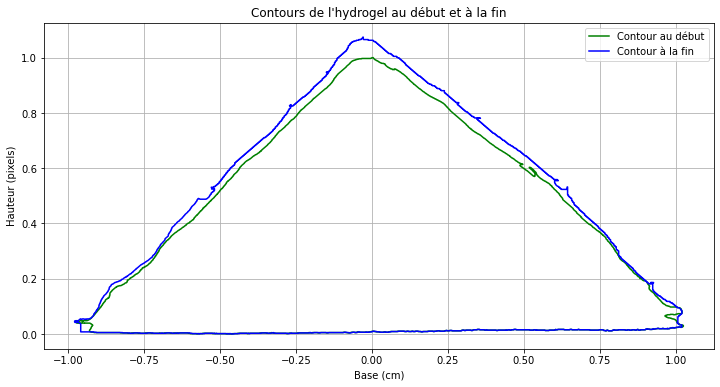

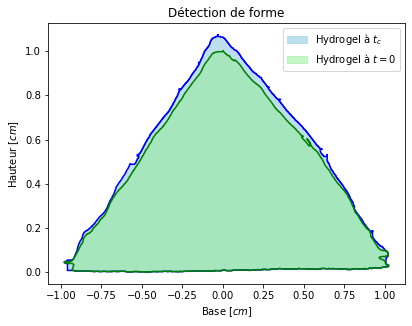

In [161]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_and_process_image(image_path):
    """
    Charge l'image, la convertit en niveaux de gris et applique un seuil pour obtenir une image binaire.
    """
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"L'image n'a pas pu être chargée à partir du chemin {image_path}")
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, 1, 255, cv2.THRESH_BINARY)
    return binary_image

def detect_and_filter_contours(binary_image, min_area=500):
    """
    Détecte et filtre les contours en fonction de leur aire minimale.
    """
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filtered_contours = [c for c in contours if cv2.contourArea(c) > min_area]
    return filtered_contours

def normalize_contour(contour, base_length, image_height):
    """
    Normalise les coordonnées du contour pour que la base du triangle soit alignée avec l'axe X.
    """
    # Calculer la bounding box du contour
    x, y, w, h = cv2.boundingRect(contour)
    scale_x = base_length / w  # Échelle basée sur la largeur du contour
    points = [(point[0][0] * scale_x, image_height - point[0][1]) for point in contour]
    return points

def rotate_points(points, angle):
    """
    Applique une rotation de 180 degrés aux points.
    """
    angle_rad = np.deg2rad(angle)
    cos_angle = np.cos(angle_rad)
    sin_angle = np.sin(angle_rad)
    rotated_points = [(x * cos_angle - y * sin_angle, x * sin_angle + y * cos_angle) for x, y in points]
    return rotated_points

# Chemins vers les images
image_path_debut = 'DebutTri.png'
image_path_fin = 'TriFin.png'

# Traitement des images
binary_image_debut = load_and_process_image(image_path_debut)
binary_image_fin = load_and_process_image(image_path_fin)

# Détection et filtrage des contours
min_area = 1000  # Aire minimale pour filtrer les petits contours parasites
contours_debut = detect_and_filter_contours(binary_image_debut, min_area)
contours_fin = detect_and_filter_contours(binary_image_fin, min_area)

# Normaliser les contours pour la base du triangle
base_length = 2  # longueur de la base en cm

# Extraire et normaliser les coordonnées des contours
image_height_debut, _ = binary_image_debut.shape
image_height_fin, _ = binary_image_fin.shape

contour_debut_points = normalize_contour(contours_debut[0], base_length, image_height_debut) if contours_debut else []
contour_fin_points = normalize_contour(contours_fin[0], base_length, image_height_fin) if contours_fin else []

# Appliquer la rotation de 180 degrés aux contours
rotated_contour_debut_points = rotate_points(contour_debut_points, 180)
rotated_contour_fin_points = rotate_points(contour_fin_points, 180)

# Convertir les points en coordonnées X et Y
def extract_coordinates(points):
    x, y = zip(*points) if points else ([], [])
    return list(x), list(y)

x_debut, y_debut = extract_coordinates(rotated_contour_debut_points)
x_fin, y_fin = extract_coordinates(rotated_contour_fin_points)



# Tracer les contours sur le graphique
plt.figure(figsize=(12, 6))
"""
# Tracer le contour pour le début
if x_debut and y_debut:
    plt.plot(-np.array(x_debut), -np.array(y_debut), label='Contour au début', color='green')

# Tracer le contour pour la fin
if x_fin and y_fin:
    plt.plot(-np.array(x_fin), -np.array(y_fin), label='Contour à la fin', color='blue')

"""

x_debut = np.array(x_debut)
y_debut = np.array(y_debut)

x_fin = np.array(x_fin)
y_fin = np.array(y_fin)

echelle_y = np.abs(np.max(y_debut)-np.min(y_debut)) #Nombre de pixels correspondant à 1cm!
offset_y_d = np.max(y_debut)
offset_y_f = np.max(y_fin)

milieu_d = x_debut[np.argmin(y_debut)]
milieu_f = x_fin[np.argmin(y_fin)]

plt.plot(-np.array(x_debut)+milieu_d, -np.array(y_debut)/echelle_y + offset_y_d/echelle_y, label='Contour au début', color='green')
plt.plot(-np.array(x_fin)+milieu_f-0.03, -np.array(y_fin)/echelle_y + offset_y_f/echelle_y, label='Contour à la fin', color='blue')
    
plt.xlabel('Base (cm)')
plt.ylabel('Hauteur (pixels)')
plt.title('Contours de l\'hydrogel au début et à la fin')
plt.legend()
plt.grid(True)
plt.savefig("Contours_Hydrogel.png")
plt.show()

# Conversion des données pour le début
x_debut_transformed = -np.array(x_debut) + milieu_d
y_debut_transformed = -np.array(y_debut) / echelle_y + offset_y_d / echelle_y

# Conversion des données pour la fin
x_fin_transformed = -np.array(x_fin) + milieu_f - 0.03
y_fin_transformed = -np.array(y_fin) / echelle_y + offset_y_f / echelle_y

# Tracé des contours avec remplissage

plt.figure(figsize=[6.4,4.8])

plt.fill(x_fin_transformed, y_fin_transformed, color='lightblue', alpha=0.8, label=r'Hydrogel à $t_c$')
plt.plot(x_fin_transformed, y_fin_transformed, color='blue')
plt.fill(x_debut_transformed, y_debut_transformed, color='lightgreen', alpha=0.5, label=r'Hydrogel à $t=0$')
plt.plot(x_debut_transformed, y_debut_transformed, color='green')

plt.xlabel(r'Base [$cm$]')
plt.ylabel(r'Hauteur [$cm$]')
plt.title("Détection de forme")

# Ajout de la légende et affichage du graphique
plt.legend()
plt.show()




In [170]:
import scienceplots

plt.rcParams.update({
    'font.size': 14,       # Taille de police générale
    'axes.titlesize': 19,  # Taille de la police du titre des axes
    'axes.labelsize': 16,  # Taille de la police des étiquettes des axes
    'xtick.labelsize': 13, # Taille de la police des étiquettes des graduations en x
    'ytick.labelsize': 13, # Taille de la police des étiquettes des graduations en y
    'legend.fontsize': 13, # Taille de la police de la légende
    'figure.titlesize': 20 # Taille de la police du titre de la figure
})

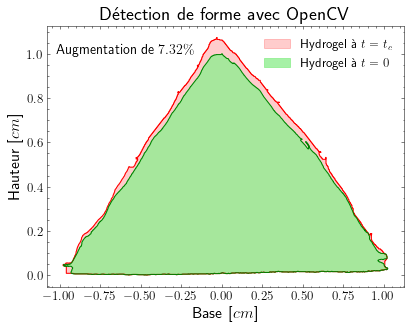

In [38]:
with plt.style.context('science'):
    plt.figure(figsize=[6.4,4.8])

    plt.fill(x_fin_transformed, y_fin_transformed, color='red', alpha=0.2, label=r'Hydrogel à $t=t_c$')
    plt.plot(x_fin_transformed, y_fin_transformed, color='red')
    plt.fill(x_debut_transformed, y_debut_transformed, color='lightgreen', alpha=0.8, label=r'Hydrogel à $t=0$')
    plt.plot(x_debut_transformed, y_debut_transformed, color='green')

    
    plt.text(-1.02, 1, r"Augmentation de $7.32\%$")
    
    plt.xlabel(r'Base [$cm$]')
    plt.ylabel(r'Hauteur [$cm$]')
    plt.title(r"Détection de forme avec OpenCV")

    # Ajout de la légende et affichage du graphique
    plt.legend()
    plt.savefig('Detection_forme.pdf')